<a href="https://colab.research.google.com/github/JahedNaghipoor/Deep_Learning/blob/master/Deep_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# import dataset
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
# Explotory Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


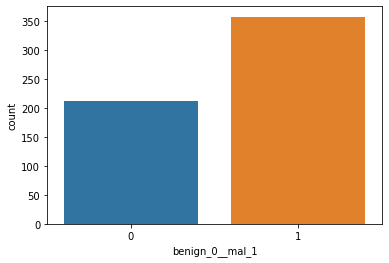

In [8]:
sns.countplot(x='benign_0__mal_1', data = df)

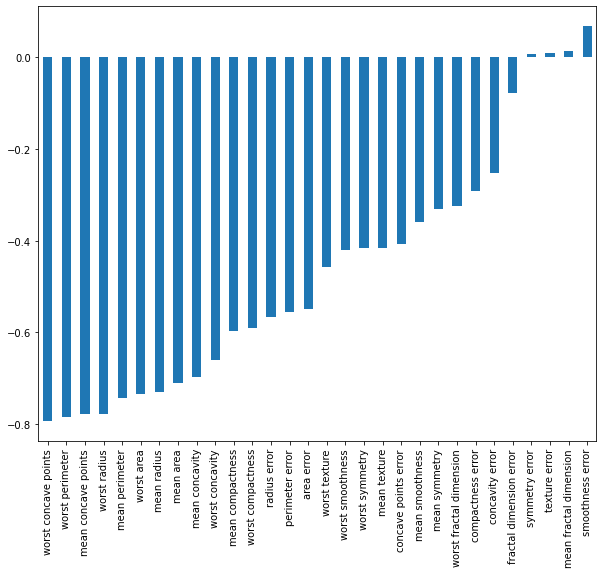

In [13]:
#correlation
plt.figure(figsize=(10,8))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

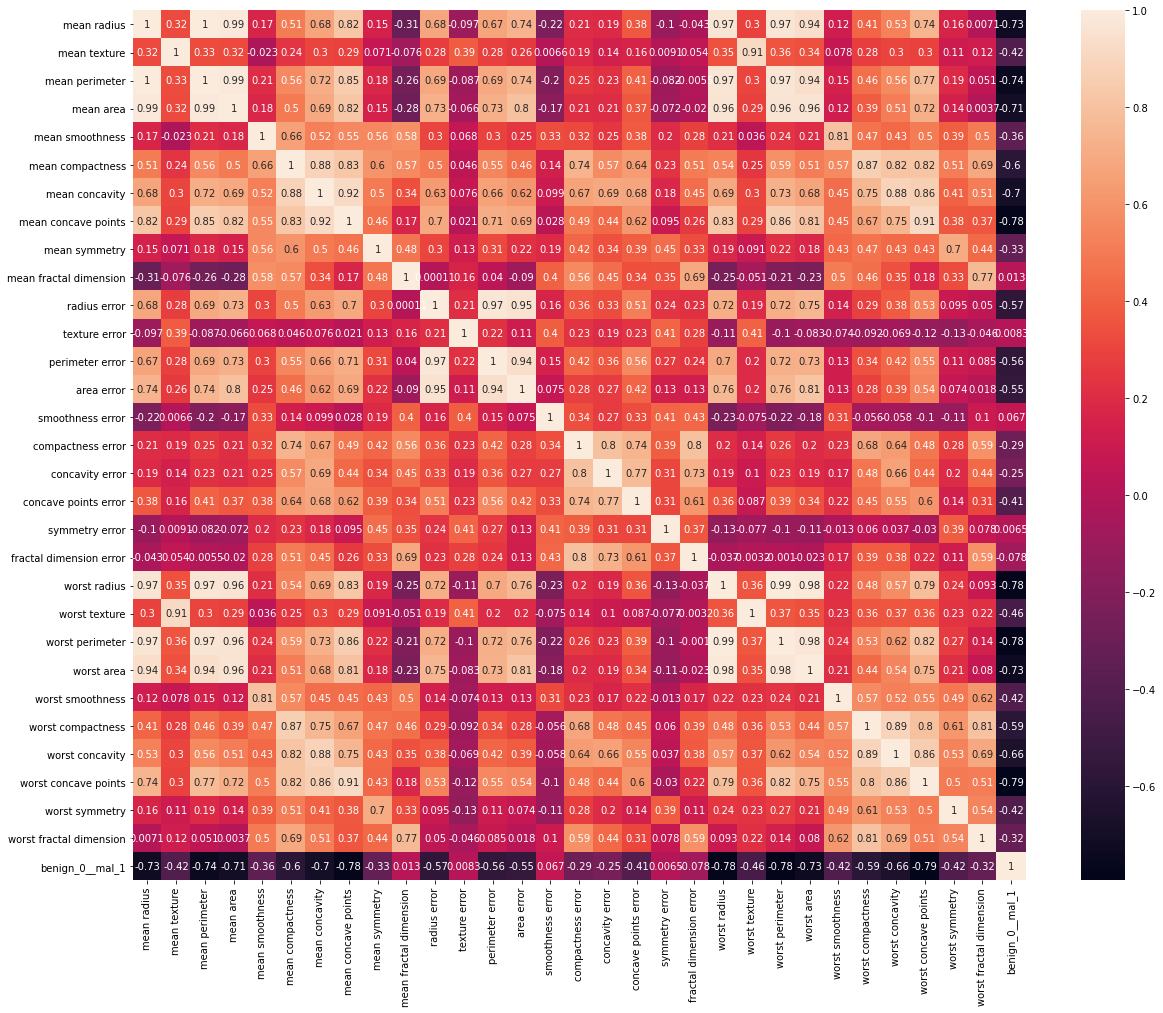

In [17]:
#correlation
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True)

In [0]:
# Training
X = df.drop('benign_0__mal_1', axis=1)
y= df['benign_0__mal_1']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6625 - val_loss: 0.6240
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6019 - val_loss: 0.5715
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5503 - val_loss: 0.5200
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4996 - val_loss: 0.4684
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4491 - val_loss: 0.4194
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4049 - val_loss: 0.3747
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3664 - val_loss: 0.3433
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3300 - val_loss: 0.3076
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3081 - val_loss: 0.2835
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2842 - val_loss: 0.2608
Epoch 11

<Figure size 864x720 with 0 Axes>

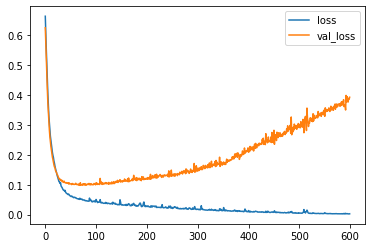

In [53]:
plt.figure(figsize=(12,10))
losses = pd.DataFrame(model.history.history)
losses.plot() #overfitting

In [0]:
#early stopping!!!
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [66]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6835 - val_loss: 0.6668
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6490 - val_loss: 0.6364
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6167 - val_loss: 0.6113
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5905 - val_loss: 0.5895
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5634 - val_loss: 0.5633
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5347 - val_loss: 0.5363
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5047 - val_loss: 0.5115
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4734 - val_loss: 0.4780
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4411 - val_loss: 0.4455
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4139 - val_loss: 0.4230
Epoch 11

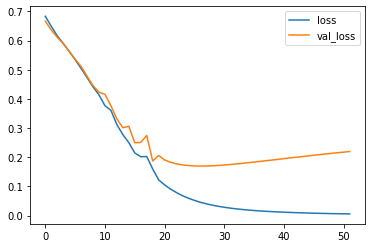

In [67]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout
#early stopping!!!
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [69]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.7196 - val_loss: 0.6673
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6666 - val_loss: 0.6257
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6176 - val_loss: 0.5905
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5865 - val_loss: 0.5525
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5300 - val_loss: 0.5188
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4968 - val_loss: 0.4790
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4662 - val_loss: 0.4433
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4340 - val_loss: 0.4244
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3965 - val_loss: 0.3798
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3783 - val_loss: 0.3588
Epoch 11

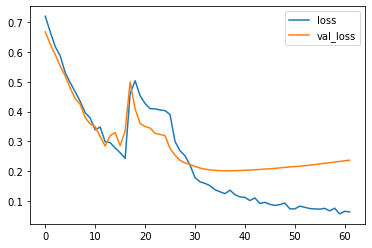

In [70]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [0]:
y_predict=model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.98      0.94      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



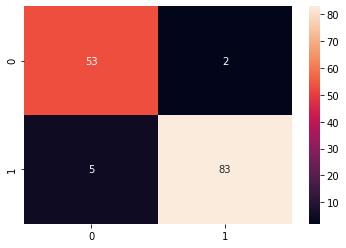

In [76]:
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)